In [59]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
print(np.__version__)
print(cv2.__version__)

1.26.4
4.10.0


In [60]:
def noise(co:list)->float:
    co = np.array(co)
    dot1 = np.dot(co, np.array([3.56, 72.12]))
    dot2 = np.dot(co, np.array([12.9898, 78.233]))
    # fract(x) -> x-floor(x)
    return (np.sin(dot1) * np.cos(dot2) * 47358.5453) - np.floor(np.sin(dot1) * np.cos(dot2) * 47358.5453)

def shade(coord:list, dim:list)->tuple:
    uv = [coord[0]/dim[0],coord[1]/dim[1]]
    s = dim[0]/dim[1]
    x = uv[0]
    y = uv[1]
    
    k = 64.0
    x = (1.0/(k*s))*np.floor(k*x*s)
    y = (1.0/k)*np.floor(k*y)
    puv = [x,y]

    d = np.array([noise(puv),noise(puv),0.55],dtype="float32")
    d = np.multiply(255.0,d)
    col = (int(d[0]),int(d[1]),int(d[2]))
    return col

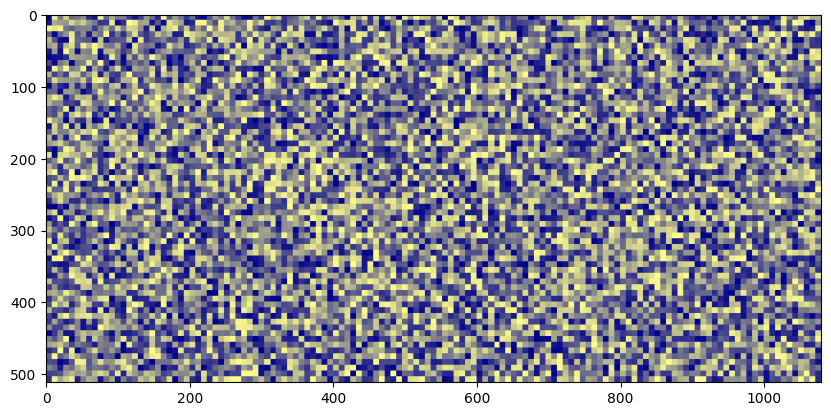

In [61]:
#test create random image
#create pillow image
w,h = 1080, 512
img = Image.new('RGB', (w,h))
for x in range(w):
    for y in range(h):
        red = int(np.floor(255.0*np.random.random_sample()))
        green = int(np.floor(255.0*np.random.random_sample()))
        blue = int(np.floor(255.0*np.random.random_sample()))
        color = (red,green,blue)
        img.putpixel([x,y], shade([x,y],[w,h]) )
#pillow image to numpy array
imgnp = np.array(img)

#show image matplotlib
plt.figure(figsize=(10,10))
plt.imshow(imgnp)
plt.axis('on')
plt.show()

<class 'numpy.ndarray'>
(640, 960, 3)


(-0.5, 479.5, 639.5, -0.5)

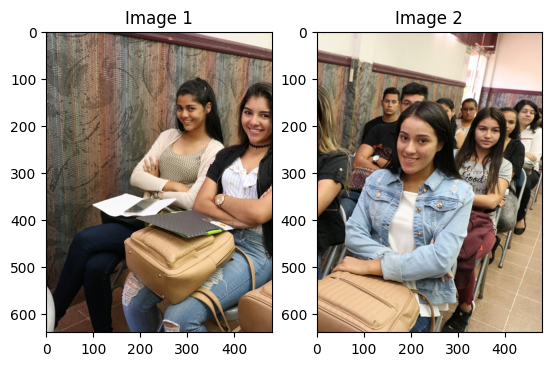

In [62]:
imgpath:str = '../sampledata/others/img_3540.jpg'
image = cv2.imread(imgpath)
imagergb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convertir BGR a RGB para matplotlib

print(type(imagergb))
print(imagergb.shape)

mid_width = imagergb.shape[1] // 2
end_width = imagergb.shape[1]
cropped_img1 = imagergb[:,:mid_width]  # Cortar desde el borde izquierdo hasta la mitad
cropped_img2 = imagergb[:,mid_width:end_width]

# Mostrar la imagen cortada
#plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(cropped_img1)
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(cropped_img2)
plt.title('Image 2')
plt.axis('on')

In [63]:
def subdivideimage(img: np.ndarray, rows: int, cols: int) -> list:
    """
    Divide una imagen en una cantidad específica de filas y columnas.
    
    Parameters:
    img (np.ndarray): La imagen a subdividir.
    rows (int): Numero de subdivisiones a lo largo del eje vertical (filas).
    cols (int): Numero de subdivisiones a lo largo del eje horizontal (columnas).

    Returns:
    list: Lista de subimágenes como np.ndarray.
    """
    # Obtener las dimensiones de cada subimagen
    height, width = img.shape[0] // rows, img.shape[1] // cols
    
    subimages:list = []
    
    # Iterar sobre cada subimagen
    for i in range(rows):
        for j in range(cols):
            #Definir los límites de la subimagen
            start_y = i * height
            end_y = start_y + height
            start_x = j * width
            end_x = start_x + width
            
            #Extraer la subimagen
            subimg = img[start_y:end_y, start_x:end_x]
            subimages.append(subimg)
    
    return subimages

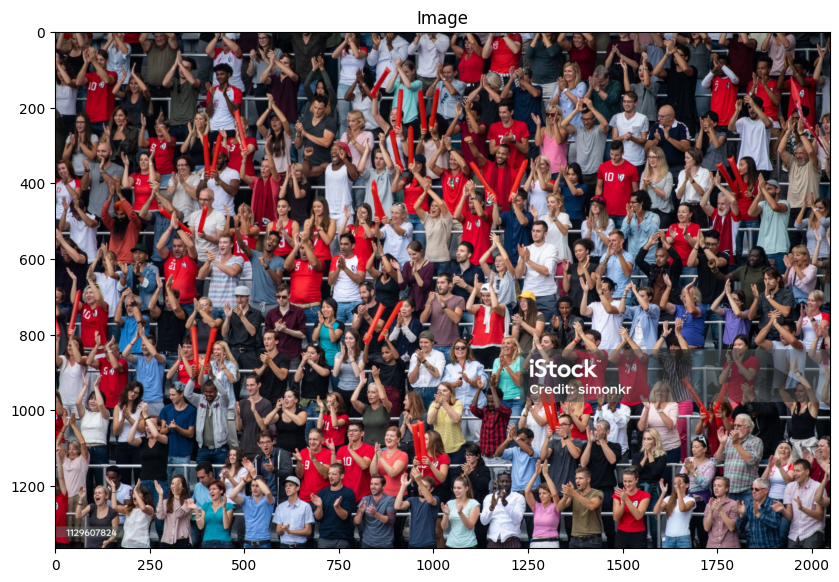

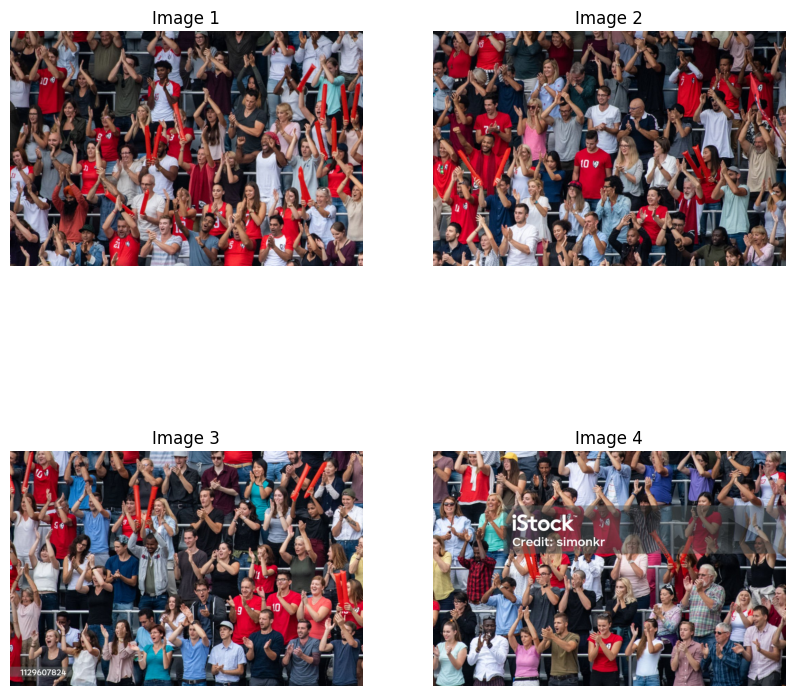

In [65]:
# Ejemplo de uso
imgpath = '../sampledata/crowds/group-people-12.jpg'
image = cv2.imread(imgpath)
imagergb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Subdividir la imagen en fila x columna
rows:int = 2
cols:int = 2
subimages = subdivideimage(imagergb, rows,cols)

plt.figure(figsize=(10,10))
plt.imshow(imagergb)
plt.title('Image')
plt.axis('on')

#Mostrar las subimagenes
plt.figure(figsize=(10, 10))
for i, subimg in enumerate(subimages):
    plt.subplot(rows,cols, i + 1)
    plt.imshow(subimg)
    plt.title(f'Image {i+1}')
    plt.axis('off')
plt.show()